<div class="alert alert-block alert-info" align="center">
    <h1>
        Imports
    </h1>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# CNN
import mnist
import pandas as pd

# NN
import matplotlib
import keras
import seaborn as sns

from matplotlib.colors import ListedColormap
from matplotlib.legend_handler import HandlerLine2D
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


<div class="alert alert-block alert-info" align="center">
    <h1>
        CNN
    </h1>
</div>

<div align="center"><h1> Déclarations </h1></div>

In [2]:
class Conv3x3:
    # A Convolution layer using 3x3 filters.

    def __init__(self, num_filters):
        self.num_filters = num_filters

        # filters is a 3d array with dimensions (num_filters, 3, 3)
        # We divide by 9 to reduce the variance of our initial values
        self.filters = np.random.randn(num_filters, 3, 3) / 9

    def iterate_regions(self, image):
        '''
        Generates all possible 3x3 image regions using valid padding.
        - image is a 2d numpy array
        '''
        h, w = image.shape

        for i in range(h - 2):
            for j in range(w - 2):
                im_region = image[i:(i + 3), j:(j + 3)]
                yield im_region, i, j

    def forward(self, input):
        '''
        Performs a forward pass of the conv layer using the given input.
        Returns a 3d numpy array with dimensions (h, w, num_filters).
        - input is a 2d numpy array
        '''
        h, w = input.shape
        output = np.zeros((h - 2, w - 2, self.num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))

        return output

class MaxPool2:
    # A Max Pooling layer using a pool size of 2.

    def iterate_regions(self, image):
        '''
        Generates non-overlapping 2x2 image regions to pool over.
        - image is a 2d numpy array
        '''
        h, w, _ = image.shape
        new_h = h // 2
        new_w = w // 2

        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
                yield im_region, i, j

    def forward(self, input):
        '''
        Performs a forward pass of the maxpool layer using the given input.
        Returns a 3d numpy array with dimensions (h / 2, w / 2, num_filters).
        - input is a 3d numpy array with dimensions (h, w, num_filters)
        '''
        h, w, num_filters = input.shape
        output = np.zeros((h // 2, w // 2, num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.amax(im_region, axis=(0, 1))

        return output

<div align="center"><h1> Application </h1></div>

MNIST CNN initialized !

Step 10/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


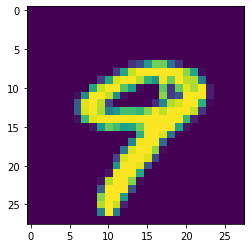


Step 20/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


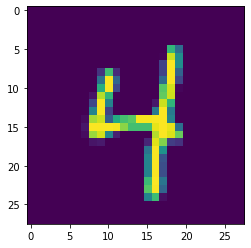


Step 30/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


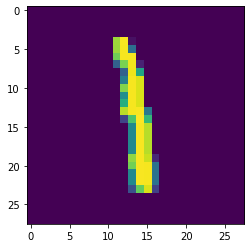


Step 40/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


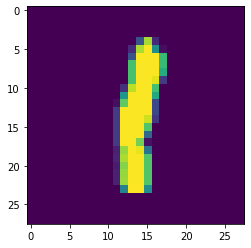


Step 50/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


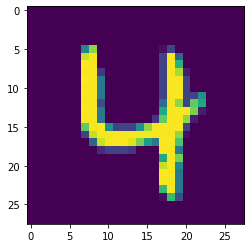


Step 60/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


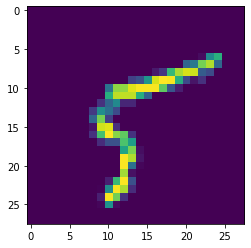


Step 70/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


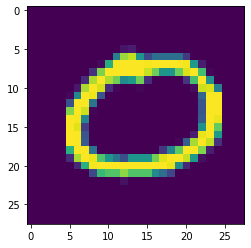


Step 80/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


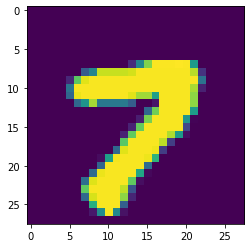


Step 90/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


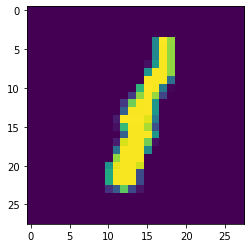


Step 100/100 Past 100 steps :
Data :
[ 0.3292045  -0.16580083  0.15679758 ... -0.05493046  0.18628487
  0.21927649]
Image :


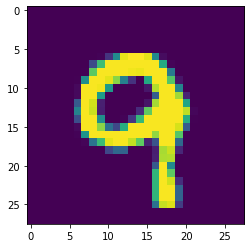

In [3]:
# We only use the first 1k testing examples (out of 10k total)
# in the interest of time. Feel free to change this if you want.
test_images = mnist.test_images()[:100]
test_labels = mnist.test_labels()[:100]

conv = Conv3x3(8)                  # 28x28x1 -> 26x26x8
pool = MaxPool2()                  # 26x26x8 -> 13x13x8

def forward(image, label):
    '''
    Completes a forward pass of the CNN and calculates the accuracy and
    cross-entropy loss.
    - image is a 2d numpy array
    - label is a digit
    '''
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.
    outConv = conv.forward((image / 255) - 0.5)
    #print(f'La sortie du outConv :\n{outConv}')
    outPool = pool.forward(outConv)
    #print(f'La sortie du outPool :\n{outPool}')
    outFlat = outPool.flatten()
    #print(f'La sortie du outFlat :\n{outFlat}')

    return outFlat

print('MNIST CNN initialized !')

array = []
loss = 0
num_correct = 0
file = open("csv/MNN.csv", "w+")
for i, (im, label) in enumerate(zip(test_images, test_labels)):
    # Do a forward pass.
    output = forward(im, label) #Ajouter le label au csv

    # Print stats every 100 steps.
    if i % 10 == 9:
        print(f'\nStep {i+1}/100 Past 100 steps :')
        print(f'Data :')
        print(output)
        print(f'Image :')
        plt.imshow(im)
        plt.show()
        array.append(output)
df = pd.DataFrame(array)
df.to_csv("csv/MNN.csv", sep=";")
file.close()

<div class="alert alert-block alert-info" align="center">
    <h1>
        NN
    </h1>
</div>

<div align="center"><h1> Déclarations </h1></div>

In [4]:
#fonctions utiles
def plot_histories (eta,epochs,cost_history,accuracy_history):
    fig,ax = plt.subplots(figsize=(5,5))
    ax.set_ylabel(r'$J(\theta)$')
    ax.set_xlabel('Epochs')
    ax.set_title(r"$\eta$ :{}".format(eta))
    line1, = ax.plot(range(epochs),cost_history,label='Cost')
    line2, = ax.plot(range(epochs),accuracy_history,label='Accuracy')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
    
def plot_decision_boundary(func, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots()
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.title("Decision Boundary")

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - x ** 2

def relu(x):
    return np.maximum(0,x)

def relu_prime(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def leakyrelu(x):
    return np.maximum(0.01,x)

def leakyrelu_prime(x):
    x[x<=0] = 0.01
    x[x>0] = 1
    return x

def softmax(x):
    expx = np.exp(x - np.max(x))
    return expx / expx.sum(axis=0, keepdims=True)

In [5]:
class Layer:
    def __init__(self,output,*args,**kwargs):
        
        self.output = output # Number of neurons at  layer i (current layer) 
        self.input = kwargs.get("input",None) # Number of neurons at layer i-1
        self.activ_function_curr = kwargs.get("activation",None) # Activation function for the layer
        self.parameters ={}
        self.derivatives={}
        self.activation_func=None
        if self.activ_function_curr == "relu":
            self.activation_func = relu
            self.backward_activation_func = relu_prime
        elif self.activ_function_curr == "sigmoid":
            self.activation_func = sigmoid
            self.backward_activation_func = sigmoid_prime
        elif self.activ_function_curr == "tanh":
            self.activation_func = tanh
            self.backward_activation_func = tanh_prime
        elif self.activ_function_curr == "leakyrelu":
            self.activation_func = leakyrelu
            self.backward_activation_func = leakyrelu_prime
        elif self.activ_function_curr == "softmax":
            self.activation_func = softmax
            self.backward_activation_func = softmax    
        
    def initParams(self):
        # initialisation du dictionnaire de données parameters contenant W, A et Z pour un layer
        seed=30
        np.random.seed(seed)
        self.parameters['W']=np.random.randn(self.output,self.input)*np.sqrt(2/self.input)
        self.parameters['b']=np.random.randn(self.output,1)*0.1
               
    def setW(self,matW):
        self.parameters['W']=np.copy(matW)
        
    def setA(self,matA):
        self.parameters['A']=np.copy(matA) 
        
    def setZ(self,matZ):
        self.parameters['Z']=np.copy(matZ)
    
    def setB(self,matB):
        self.parameters['b']=np.copy(matB)
        
    def setdW(self,matdW):
        self.parameters['dW']=np.copy(matdW)
        
    def setdA(self,matdA):
        self.parameters['dA']=np.copy(matdA)
        
    def setdZ(self,matdZ):
        self.parameters['dZ']=np.copy(matdZ)
    
    def setdB(self,matdB):
        self.parameters['db']=np.copy(matdB)
        
class NeuralNetwork:
    def __init__(self):
        self.nbLayers=0
        self.layers=[]     
        
    def info(self):
        print("Content of the network:");
        j=0;
        for i in range(len(self.layers)):
            print("Layer n° ",i," => ")
            print ("\tInput ", self.layers[i].input, 
                   "\tOutput", self.layers[i].output)             
            if (i != 0):
                print ("\tActivation Function",self.layers[i].activation_func)
                print ("\tW", self.layers[i].parameters['W'].shape,self.layers[i].parameters['W'])
                print ("\tb", self.layers[i].parameters['b'].shape,self.layers[i].parameters['b'])

    #ajout d'un param pour le type
    def addLayer(self,layer):
        self.nbLayers += 1;
        if (self.nbLayers==1): 
            # this is the first layer so adding a layer 0
            layerZero=Layer(layer.input)
            self.layers.append(layerZero)
            
        self.layers.append(layer) 
        self.layers[self.nbLayers].input=self.layers[self.nbLayers-1].output
        self.layers[self.nbLayers].output=self.layers[self.nbLayers].output
        layer.initParams()

        
        
    def set_parametersW_b (self,numlayer,matX,matb):
        self.layers[numlayer].parameters['W']=np.copy(matX)
        self.layers[numlayer].parameters['b']=np.copy(matb)
        
        
    def forward_propagation(self, X):
        #Init predictive variables for the input layer
        self.layers[0].setA(X)
        
        #Propagation for all the layers
        for l in range(1, self.nbLayers + 1):
            # Compute Z
            self.layers[l].setZ(np.dot(self.layers[l].parameters['W'],
                                       self.layers[l-1].parameters['A'])+self.layers[l].parameters['b'])
            # Applying the activation function of the layer to Z
            self.layers[l].setA(self.layers[l].activation_func(self.layers[l].parameters['Z']))
            
    
    def cost_function(self,y):            
        return (-(y*np.log(self.layers[self.nbLayers].parameters['A']+1e-8) + (1-y)*np.log( 1 - self.layers[self.nbLayers].parameters['A']+1e-8))).mean()
    
    def backward_propagation(self,y):
        #calcul de dZ dW et db pour le dernier layer
        self.layers[self.nbLayers].derivatives['dZ']=self.layers[self.nbLayers].parameters['A']-y
        self.layers[self.nbLayers].derivatives['dW']=np.dot(self.layers[self.nbLayers].derivatives['dZ'],
                                                             np.transpose(self.layers[self.nbLayers-1].parameters['A']))
        m=self.layers[self.nbLayers].parameters['A'].shape[1]#égal au nombre de colonnes de A 
        self.layers[self.nbLayers].derivatives['db']=np.sum(self.layers[self.nbLayers].derivatives['dZ'], 
                                                       axis=1, keepdims=True) / m
        
        #calcul de dZ dW db pour les autres layers
        for l in range(self.nbLayers-1,0,-1) :
            self.layers[l].derivatives['dZ']=np.dot(np.transpose(self.layers[l+1].parameters['W']),
                                            self.layers[l+1].derivatives['dZ'])*self.layers[l].backward_activation_func(self.layers[l].parameters["Z"])
            
            self.layers[l].derivatives["dW"]=np.dot(self.layers[l].derivatives['dZ'],
                                            np.transpose(self.layers[l-1].parameters['A']))
                       
            m=self.layers[l-1].parameters['A'].shape[1]#égal au nombre de colonnes de A 
            self.layers[l].derivatives['db']=np.sum(self.layers[l].derivatives['dZ'], 
                                                       axis=1, keepdims=True) / m    
            
    def update_parameters(self, eta) :
        for l in range(1,self.nbLayers+1) :
            self.layers[l].parameters['W']-=eta*self.layers[l].derivatives['dW']
            self.layers[l].parameters["b"]-=eta*self.layers[l].derivatives["db"]
            
    def convert_prob_into_class(self,probs):
        probs = np.copy(probs)#pour ne pas perdre probs, i.e. y_hat
        probs[probs > 0.5] = 1
        probs[probs <= 0.5] = 0
        return probs
    
    def plot_W_b_epoch (self,epoch,parameter_history):
        mat=[]
        max_size_layer=0
        for l in range(1, self.nbLayers+1):    
            value=parameter_history[epoch]['W'+str(l)]
            if (parameter_history[epoch]['W'+str(l)].shape[1]>max_size_layer):
                max_size_layer=parameter_history[epoch]['W'+str(l)].shape[1]
            mat.append(value)
        figure=plt.figure(figsize=((self.nbLayers+1)*3,int (max_size_layer/2)))    
        for nb_w in range (len(mat)):    
                plt.subplot(1, len(mat), nb_w+1)
                plt.matshow(mat[nb_w],cmap = plt.cm.gist_rainbow,fignum=False, aspect='auto')
                plt.colorbar()    
        thelegend="Epoch "+str(epoch)
        plt.title (thelegend)    

    def accuracy(self,y_hat, y):
        if self.layers[self.nbLayers].activation_func==softmax:
            # si la fonction est softmax, les valeurs sont sur différentes dimensions
            # il faut utiliser argmax avec axis=0 pour avoir un vecteur qui indique
            # où est la valeur maximale à la fois pour y_hat et pour y
            # comme cela il suffit de comparer les deux vecteurs qui indiquent 
            # dans quelle ligne se trouve le max
            y_hat_encoded=np.copy(y_hat)
            y_hat_encoded = np.argmax(y_hat_encoded, axis=0)
            y_encoded=np.copy(y)
            y_encoded=np.argmax(y_encoded, axis=0)
            return (y_hat_encoded == y_encoded).mean()
        # la dernière fonction d'activation n'est pas softmax.
        # par exemple sigmoid pour une classification binaire
        # il suffit de convertir la probabilité du résultat en classe
        y_hat_ = self.convert_prob_into_class(y_hat)
        return (y_hat_ == y).all(axis=0).mean()       
    
    def predict(self, x):
        self.forward_propagation(x)
        return self.layers[self.nbLayers].parameters['A']
    
    def next_batch(self,X, y, batchsize):
        # pour avoir X de la forme : 2 colonnes, m lignes (examples) et également y
        # cela permet de trier les 2 tableaux avec un indices de permutation       
        X=np.transpose(X)
        y=np.transpose(y)
        
        m=len(y)
        # permutation aléatoire de X et y pour faire des batchs avec des valeurs au hasard
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in np.arange(0, X.shape[0], batchsize):
            # creation des batchs de taille batchsize
            yield (X[i:i + batchsize], y[i:i + batchsize])
    def fit(self, X, y, *args,**kwargs):    
        epochs=kwargs.get("epochs",20)
        verbose=kwargs.get("verbose",False)
        eta =kwargs.get("eta",0.01)
        batchsize=kwargs.get("batchsize",32)
    #def fit(self, X, y, epochs, eta = 0.01,batchsize=64) :
        # sauvegarde historique coût et accuracy pour affichage
        cost_history = []
        accuracy_history = []
        parameter_history = []
        for i in range(epochs):
            i+=1
            # sauvegarde des coûts et accuracy par mini-batch
            cost_batch = []
            accuracy_batch = []
            # Descente de gradient par mini-batch
            for (batchX, batchy) in self.next_batch(X, y, batchsize):
                # Extraction et traitement d'un batch à la fois
                
                # mise en place des données au bon format
                batchX=np.transpose(batchX)
                if self.layers[self.nbLayers].activation_func==softmax:
                    # la classification n'est pas binaire, y a utilisé one-hot-encoder
                    # le batchy doit donc être transposé et le résultat doit
                    # être sous la forme d'une matrice de taille batchy.shape[1]
                    
                    batchy=np.transpose(batchy.reshape((batchy.shape[0], batchy.shape[1])))
                else:
                    # il s'agit d'une classification binaire donc shape[1] n'existe
                    # pas
                    batchy=np.transpose(batchy.reshape((batchy.shape[0], 1)))
                #batchy=np.transpose(batchy.reshape((batchy.shape[0], 1)))
                self.forward_propagation(batchX)
                self.backward_propagation(batchy)
                self.update_parameters(eta)
                
                # sauvegarde pour affichage
                current_cost=self.cost_function(batchy)
                cost_batch.append(current_cost)
                y_hat = self.predict(batchX)
                current_accuracy = self.accuracy(y_hat, batchy)
                accuracy_batch.append(current_accuracy)
               
            # SaveStats on W, B as well as values for A,Z, W, b
            save_values = {}
            save_values["epoch"]=i
            for l in range(1, self.nbLayers+1):
                save_values["layer"+str(l)]=l
                save_values["Wmean"+ str(l)]=np.mean(self.layers[self.nbLayers].parameters['W'])
                save_values["Wmax"+ str(l)]=np.amax(self.layers[self.nbLayers].parameters['W'])
                save_values["Wmin"+str(l)]=np.amin(self.layers[self.nbLayers].parameters['W'])
                save_values["Wstd"+str(l)]=np.std(self.layers[self.nbLayers].parameters['W'])
                save_values["bmean"+ str(l)]=np.mean(self.layers[self.nbLayers].parameters['b'])
                save_values["bmax"+ str(l)]=np.amax(self.layers[self.nbLayers].parameters['b'])
                save_values["bmin"+str(l)]=np.amin(self.layers[self.nbLayers].parameters['b'])
                save_values["bstd"+str(l)]=np.std(self.layers[self.nbLayers].parameters['b'])
                # be careful A,Z,W and b must be copied otherwise it is a referencee
                save_values['A'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['A'])
                save_values['Z'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['Z'])
                save_values['W'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['W'])
                save_values['b'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['b'])
                
            parameter_history.append(save_values)        
            # sauvegarde de la valeur moyenne des coûts et de l'accuracy du batch pour affichage
            current_cost=np.average(cost_batch)
            cost_history.append(current_cost)
            current_accuracy=np.average(accuracy_batch)
            accuracy_history.append(current_accuracy)
        
            if(verbose == True):
                print("Epoch : #%s/%s - %s/%s - cost : %.4f - accuracy : %.4f"%(i,epochs,X.shape[1],X.shape[1], float(current_cost), current_accuracy))
              
        return self.layers, cost_history, accuracy_history, parameter_history

<div align="center"><h1> Application </h1></div>

Epoch : #1/10 - 90/90 - cost : 0.8150 - accuracy : 0.6242
Epoch : #2/10 - 90/90 - cost : 0.3509 - accuracy : 0.7796
Epoch : #3/10 - 90/90 - cost : 0.3166 - accuracy : 0.7877
Epoch : #4/10 - 90/90 - cost : 0.2784 - accuracy : 0.7869
Epoch : #5/10 - 90/90 - cost : 0.2748 - accuracy : 0.7877
Epoch : #6/10 - 90/90 - cost : 0.2695 - accuracy : 0.7853
Epoch : #7/10 - 90/90 - cost : 0.2610 - accuracy : 0.7748
Epoch : #8/10 - 90/90 - cost : 0.2512 - accuracy : 0.8053
Epoch : #9/10 - 90/90 - cost : 0.2550 - accuracy : 0.8061
Epoch : #10/10 - 90/90 - cost : 0.2469 - accuracy : 0.8085
Accuracy test: 0.783


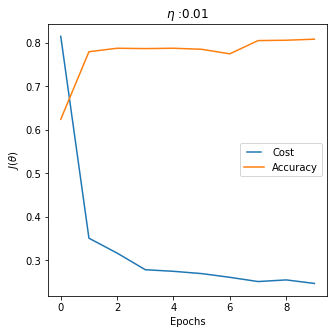

In [6]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

df = pd.read_csv(url, names=names)

# mélange des données
df=df.sample(frac=1).reset_index(drop=True)

array = df.values #necessité de convertir le dataframe en numpy
#X matrice de variables prédictives - attention forcer le type à float
X = array[:,0:4].astype('float64') 

#y vecteur de variable à prédire 
y = array[:,4]

#-----------------------------------------------------------------------------------------------------

# normalisation de X
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

#-----------------------------------------------------------------------------------------------------

# Conversion de la variable à prédire via OneHotEncoder 
# Dans IRIS il y a 3 classes -> création de 3 colonnes pour y
# 1 colonne correspond à 1 classe -> 1 si la ligne est du type de la classe
# 0 sinon

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

#-----------------------------------------------------------------------------------------------------

# Jeu de test/apprentissage
validation_size=0.6 #40% du jeu de données pour le test

testsize= 1-validation_size
seed=30
# séparation jeu d'apprentissage et jeu de test
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


#transformation des données pour être au bon format
# X_train est de la forme : n colonnes (variables à prédire après OneHotEncoder), m lignes (examples)
# y_train est de la forme : m colonnes, n lignes (variables à prédire après OneHotEncoder)

# La transposée de X_train est de la forme : m colonnes (exemples), n lignes (nombre de variables prédictives)
X_train=np.transpose(X_train)

# y_train est forcé pour être un tableau à 1 ligne contenant m colonnes
y_train=np.transpose(y_train.reshape((y_train.shape[0], y_train.shape[1])))

# mêmes traitements pour le jeu de test
X_test=np.transpose(X_test)
y_test=np.transpose(y_test.reshape((y_test.shape[0], y_test.shape[1])))

#-----------------------------------------------------------------------------------------------------

network = NeuralNetwork()

network.addLayer(Layer(10,input=4,activation="leakyrelu"))
network.addLayer(Layer(3,activation="softmax"))

#network.info()


epochs = 10
eta = 0.01
batchsize=128

#Entraînement du classifieur
layers,cost_history,accuracy_history,parameter_history=network.fit(X_train, y_train, verbose=True, epochs=epochs)


#Prédiction
y_pred=network.predict(X_test)
accuracy_test = network.accuracy(y_pred, y_test)
print("Accuracy test: %.3f"%accuracy_test)

# Affichage des historiques
plot_histories (eta,epochs,cost_history,accuracy_history)

Epoch : #1/20 - 6/6 - cost : 0.5095 - accuracy : 0.0000
Epoch : #2/20 - 6/6 - cost : 0.4584 - accuracy : 0.1667
Epoch : #3/20 - 6/6 - cost : 0.4127 - accuracy : 0.1667
Epoch : #4/20 - 6/6 - cost : 0.3719 - accuracy : 0.1667
Epoch : #5/20 - 6/6 - cost : 0.3355 - accuracy : 0.3333
Epoch : #6/20 - 6/6 - cost : 0.3032 - accuracy : 0.3333
Epoch : #7/20 - 6/6 - cost : 0.2744 - accuracy : 0.3333
Epoch : #8/20 - 6/6 - cost : 0.2490 - accuracy : 0.5000
Epoch : #9/20 - 6/6 - cost : 0.2270 - accuracy : 0.5000
Epoch : #10/20 - 6/6 - cost : 0.2077 - accuracy : 0.5000
Epoch : #11/20 - 6/6 - cost : 0.1909 - accuracy : 0.6667
Epoch : #12/20 - 6/6 - cost : 0.1766 - accuracy : 0.8333
Epoch : #13/20 - 6/6 - cost : 0.1645 - accuracy : 0.8333
Epoch : #14/20 - 6/6 - cost : 0.1544 - accuracy : 0.8333
Epoch : #15/20 - 6/6 - cost : 0.1458 - accuracy : 0.8333
Epoch : #16/20 - 6/6 - cost : 0.1385 - accuracy : 0.8333
Epoch : #17/20 - 6/6 - cost : 0.1321 - accuracy : 1.0000
Epoch : #18/20 - 6/6 - cost : 0.1263 - a

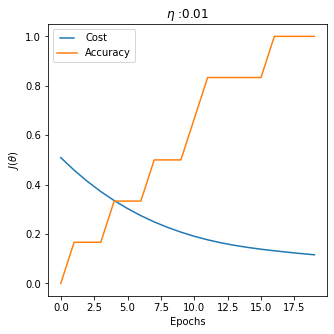

In [7]:
names = ['0','1','2','3','4','5','6','7','8','9','pred']

df = pd.read_csv('csv/mnist.csv', names=names)

# mélange des données
df=df.sample(frac=1).reset_index(drop=True)

array = df.values #necessité de convertir le dataframe en numpy
#X matrice de variables prédictives - attention forcer le type à float
X = array[:,0:10].astype('float64') 
#print(X)

#y vecteur de variable à prédire 
y = array[:,10]
#print(y)

#-----------------------------------------------------------------------------------------------------

# normalisation de X
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

#-----------------------------------------------------------------------------------------------------

# Conversion de la variable à prédire via OneHotEncoder 
# Dans IRIS il y a 3 classes -> création de 3 colonnes pour y
# 1 colonne correspond à 1 classe -> 1 si la ligne est du type de la classe
# 0 sinon

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

#-----------------------------------------------------------------------------------------------------

# Jeu de test/apprentissage
validation_size=0.6 #40% du jeu de données pour le test

testsize= 1-validation_size
seed=30
# séparation jeu d'apprentissage et jeu de test
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


#transformation des données pour être au bon format
# X_train est de la forme : n colonnes (variables à prédire après OneHotEncoder), m lignes (examples)
# y_train est de la forme : m colonnes, n lignes (variables à prédire après OneHotEncoder)

# La transposée de X_train est de la forme : m colonnes (exemples), n lignes (nombre de variables prédictives)
X_train=np.transpose(X_train)

# y_train est forcé pour être un tableau à 1 ligne contenant m colonnes
y_train=np.transpose(y_train.reshape((y_train.shape[0], y_train.shape[1])))

# mêmes traitements pour le jeu de test
X_test=np.transpose(X_test)
y_test=np.transpose(y_test.reshape((y_test.shape[0], y_test.shape[1])))

#-----------------------------------------------------------------------------------------------------

network = NeuralNetwork()

network.addLayer(Layer(20,input=10,activation="leakyrelu"))
network.addLayer(Layer(10,activation="softmax"))

#network.info()

epochs = 20
eta = 0.01
batchsize=128

#Entraînement du classifieur
layers,cost_history,accuracy_history,parameter_history=network.fit(X_train, y_train, verbose=True, epochs=epochs)


#Prédiction
y_pred=network.predict(X_test)
accuracy_test = network.accuracy(y_pred, y_test)
print("Accuracy test: %.3f"%accuracy_test)

# Affichage des historiques
plot_histories (eta,epochs,cost_history,accuracy_history)

In [8]:
class MyLayer:
    def __init__(self,*args,**kwargs):
        self.input = kwargs.get("input",None) # Number of neurons at layer i-1
        self.output = kwargs.get("output",None) # Number of neurons at  layer i (current layer) 
        self.activ_function_curr = kwargs.get("activation",None) # Activation function for the layer
        self.type = kwargs.get("type",None)
        self.couche = kwargs.get("couche",None)
        self.parameters ={}
        self.derivatives={}
        
        if type=='RNN':
            self.parameters ={}
            self.derivatives={}
            self.activation_func=None
            if self.activ_function_curr == "relu":
                self.activation_func = relu
                self.backward_activation_func = relu_prime
            elif self.activ_function_curr == "sigmoid":
                self.activation_func = sigmoid
                self.backward_activation_func = sigmoid_prime
            elif self.activ_function_curr == "tanh":
                self.activation_func = tanh
                self.backward_activation_func = tanh_prime
            elif self.activ_function_curr == "leakyrelu":
                self.activation_func = leakyrelu
                self.backward_activation_func = leakyrelu_prime
            elif self.activ_function_curr == "softmax":
                self.activation_func = softmax
                self.backward_activation_func = softmax 
        elif type =='CNN':
             # Activation function for the layer
            self.couche_func=None
            if self.couche == "Conv3x3(8)":
                self.couche_func=Conv3x3(8)
            elif self.couche == "MaxPool2()":
                self.couche_func = MaxPool2()
            elif self.couche == "Flatten()":
                self.couche_func = Flatten()

    def initParams(self):
        # initialisation du dictionnaire de données parameters contenant W, A et Z pour un layer
        seed=30
        np.random.seed(seed)
        self.parameters['W']=np.random.randn(self.output,self.input)*np.sqrt(2/self.input)
        self.parameters['b']=np.random.randn(self.output,1)*0.1
               
    def setW(self,matW):
        self.parameters['W']=np.copy(matW)
        
    def setA(self,matA):
        self.parameters['A']=np.copy(matA) 
        
    def setZ(self,matZ):
        self.parameters['Z']=np.copy(matZ)
    
    def setB(self,matB):
        self.parameters['b']=np.copy(matB)
        
    def setdW(self,matdW):
        self.parameters['dW']=np.copy(matdW)
        
    def setdA(self,matdA):
        self.parameters['dA']=np.copy(matdA)
        
    def setdZ(self,matdZ):
        self.parameters['dZ']=np.copy(matdZ)
    
    def setdB(self,matdB):
        self.parameters['db']=np.copy(matdB)

class MyNeuralNetwork:
    def __init__(self):
        self.nbLayers = 0
        self.nbCNNlayers = 0
        self.layers=[]     
        self.CNN=[]
        
    def info(self):
        print("Content of the network:");
        j=0;
        for i in range(len(self.layers)):
            print("MyLayer n° ",i," => ")
            print ("\tInput ", self.layers[i].input, 
                   "\tOutput", self.layers[i].output)             
            if (i != 0):
                print ("\t Type",self.layers[i].type)
                if (self.layers[i].type== 'RNN'):
                    print ("\tActivation Function",self.layers[i].activation_func)
                elif(self.layers[i].type== 'CNN'):
                    print ("\t Couche",self.layers[i].couche_CNN)
                print ("\tW", self.layers[i].parameters['W'].shape,self.layers[i].parameters['W'])
                print ("\tb", self.layers[i].parameters['b'].shape,self.layers[i].parameters['b'])

    #ajout d'un param pour le type
    def addLayer(self,layer):
        if(type=='CNN'):
            self.nbCNNlayers += 1
            self.layers.append(layer)
            #Traiter le CNN layer 0, mettre à jour les params
        elif(type=='RNN'):
            self.nbLayers += 1;
            if(self.nbLayers==1): # à modifier si CNN existe récuperer le dernier layer de CNN
                # this is the first layer so adding a layer 0
                layerZero=MyLayer(layer.input,layer.type)
                self.layers.append(layerZero)

            self.layers.append(layer) 
            self.layers[self.nbLayers].input=self.layers[self.nbLayers-1].output
            self.layers[self.nbLayers].output=self.layers[self.nbLayers].output
            layer.initParams()

    def set_parametersW_b (self,numlayer,matX,matb):
        self.layers[numlayer].parameters['W']=np.copy(matX)
        self.layers[numlayer].parameters['b']=np.copy(matb)

    def forward_propagation(self, X):
        if(type=='CNN'): # CNN exec boucle zhou
            #Init predictive variables for the input layer
            print('')
        elif(type=='RNN'):
            self.layers[0].setA(outputFlatten)

        #Propagation for all the layers
        for l in range(1, self.nbLayers + 1):
            # Compute Z
            if type=='RNN':
                self.layers[l].setZ(np.dot(self.layers[l].parameters['W'],
                                           self.layers[l-1].parameters['A'])+self.layers[l].parameters['b'])
                # Applying the activation function of the layer to Z
                self.layers[l].setA(self.layers[l].activation_func(self.layers[l].parameters['Z']))
            
    
    def cost_function(self,y):            
        return (-(y*np.log(self.layers[self.nbLayers].parameters['A']+1e-8) + (1-y)*np.log( 1 - self.layers[self.nbLayers].parameters['A']+1e-8))).mean()
    
    def backward_propagation(self,y):
        #calcul de dZ dW et db pour le dernier layer
        self.layers[self.nbLayers].derivatives['dZ']=self.layers[self.nbLayers].parameters['A']-y
        self.layers[self.nbLayers].derivatives['dW']=np.dot(self.layers[self.nbLayers].derivatives['dZ'],
                                                             np.transpose(self.layers[self.nbLayers-1].parameters['A']))
        m=self.layers[self.nbLayers].parameters['A'].shape[1]#égal au nombre de colonnes de A 
        self.layers[self.nbLayers].derivatives['db']=np.sum(self.layers[self.nbLayers].derivatives['dZ'], 
                                                       axis=1, keepdims=True) / m
        
        #calcul de dZ dW db pour les autres layers
        for l in range(self.nbLayers-1,0,-1) :
            self.layers[l].derivatives['dZ']=np.dot(np.transpose(self.layers[l+1].parameters['W']),
                                            self.layers[l+1].derivatives['dZ'])*self.layers[l].backward_activation_func(self.layers[l].parameters["Z"])
            
            self.layers[l].derivatives["dW"]=np.dot(self.layers[l].derivatives['dZ'],
                                            np.transpose(self.layers[l-1].parameters['A']))
                       
            m=self.layers[l-1].parameters['A'].shape[1]#égal au nombre de colonnes de A 
            self.layers[l].derivatives['db']=np.sum(self.layers[l].derivatives['dZ'], 
                                                       axis=1, keepdims=True) / m    
            
    def update_parameters(self, eta) :
        for l in range(1,self.nbLayers+1) :
            self.layers[l].parameters['W']-=eta*self.layers[l].derivatives['dW']
            self.layers[l].parameters["b"]-=eta*self.layers[l].derivatives["db"]
            
    def convert_prob_into_class(self,probs):
        probs = np.copy(probs)#pour ne pas perdre probs, i.e. y_hat
        probs[probs > 0.5] = 1
        probs[probs <= 0.5] = 0
        return probs
    
    def plot_W_b_epoch (self,epoch,parameter_history):
        mat=[]
        max_size_layer=0
        for l in range(1, self.nbLayers+1):    
            value=parameter_history[epoch]['W'+str(l)]
            if (parameter_history[epoch]['W'+str(l)].shape[1]>max_size_layer):
                max_size_layer=parameter_history[epoch]['W'+str(l)].shape[1]
            mat.append(value)
        figure=plt.figure(figsize=((self.nbLayers+1)*3,int (max_size_layer/2)))    
        for nb_w in range (len(mat)):    
                plt.subplot(1, len(mat), nb_w+1)
                plt.matshow(mat[nb_w],cmap = plt.cm.gist_rainbow,fignum=False, aspect='auto')
                plt.colorbar()    
        thelegend="Epoch "+str(epoch)
        plt.title (thelegend)    

    def accuracy(self,y_hat, y):
        if self.layers[self.nbLayers].activation_func==softmax:
            # si la fonction est softmax, les valeurs sont sur différentes dimensions
            # il faut utiliser argmax avec axis=0 pour avoir un vecteur qui indique
            # où est la valeur maximale à la fois pour y_hat et pour y
            # comme cela il suffit de comparer les deux vecteurs qui indiquent 
            # dans quelle ligne se trouve le max
            y_hat_encoded=np.copy(y_hat)
            y_hat_encoded = np.argmax(y_hat_encoded, axis=0)
            y_encoded=np.copy(y)
            y_encoded=np.argmax(y_encoded, axis=0)
            return (y_hat_encoded == y_encoded).mean()
        # la dernière fonction d'activation n'est pas softmax.
        # par exemple sigmoid pour une classification binaire
        # il suffit de convertir la probabilité du résultat en classe
        y_hat_ = self.convert_prob_into_class(y_hat)
        return (y_hat_ == y).all(axis=0).mean()       
    
    def predict(self, x):
        self.forward_propagation(x)
        return self.layers[self.nbLayers].parameters['A']
    
    def next_batch(self,X, y, batchsize):
        # pour avoir X de la forme : 2 colonnes, m lignes (examples) et également y
        # cela permet de trier les 2 tableaux avec un indices de permutation       
        X=np.transpose(X)
        y=np.transpose(y)
        
        m=len(y)
        # permutation aléatoire de X et y pour faire des batchs avec des valeurs au hasard
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in np.arange(0, X.shape[0], batchsize):
            # creation des batchs de taille batchsize
            yield (X[i:i + batchsize], y[i:i + batchsize])
    def fit(self, X, y, *args,**kwargs):    
        epochs=kwargs.get("epochs",20)
        verbose=kwargs.get("verbose",False)
        eta =kwargs.get("eta",0.01)
        batchsize=kwargs.get("batchsize",32)
    #def fit(self, X, y, epochs, eta = 0.01,batchsize=64) :
        # sauvegarde historique coût et accuracy pour affichage
        cost_history = []
        accuracy_history = []
        parameter_history = []
        for i in range(epochs):
            i+=1
            # sauvegarde des coûts et accuracy par mini-batch
            cost_batch = []
            accuracy_batch = []
            # Descente de gradient par mini-batch
            for (batchX, batchy) in self.next_batch(X, y, batchsize):
                # Extraction et traitement d'un batch à la fois
                
                # mise en place des données au bon format
                batchX=np.transpose(batchX)
                if self.layers[self.nbLayers].activation_func==softmax:
                    # la classification n'est pas binaire, y a utilisé one-hot-encoder
                    # le batchy doit donc être transposé et le résultat doit
                    # être sous la forme d'une matrice de taille batchy.shape[1]
                    
                    batchy=np.transpose(batchy.reshape((batchy.shape[0], batchy.shape[1])))
                else:
                    # il s'agit d'une classification binaire donc shape[1] n'existe
                    # pas
                    batchy=np.transpose(batchy.reshape((batchy.shape[0], 1)))
                #batchy=np.transpose(batchy.reshape((batchy.shape[0], 1)))
                self.forward_propagation(batchX)
                self.backward_propagation(batchy)
                self.update_parameters(eta)
                
                # sauvegarde pour affichage
                current_cost=self.cost_function(batchy)
                cost_batch.append(current_cost)
                y_hat = self.predict(batchX)
                current_accuracy = self.accuracy(y_hat, batchy)
                accuracy_batch.append(current_accuracy)
               
            # SaveStats on W, B as well as values for A,Z, W, b
            save_values = {}
            save_values["epoch"]=i
            for l in range(1, self.nbLayers+1):
                save_values["layer"+str(l)]=l
                save_values["Wmean"+ str(l)]=np.mean(self.layers[self.nbLayers].parameters['W'])
                save_values["Wmax"+ str(l)]=np.amax(self.layers[self.nbLayers].parameters['W'])
                save_values["Wmin"+str(l)]=np.amin(self.layers[self.nbLayers].parameters['W'])
                save_values["Wstd"+str(l)]=np.std(self.layers[self.nbLayers].parameters['W'])
                save_values["bmean"+ str(l)]=np.mean(self.layers[self.nbLayers].parameters['b'])
                save_values["bmax"+ str(l)]=np.amax(self.layers[self.nbLayers].parameters['b'])
                save_values["bmin"+str(l)]=np.amin(self.layers[self.nbLayers].parameters['b'])
                save_values["bstd"+str(l)]=np.std(self.layers[self.nbLayers].parameters['b'])
                # be careful A,Z,W and b must be copied otherwise it is a referencee
                save_values['A'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['A'])
                save_values['Z'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['Z'])
                save_values['W'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['W'])
                save_values['b'+str(l)]=np.copy(self.layers[self.nbLayers].parameters['b'])
                
            parameter_history.append(save_values)        
            # sauvegarde de la valeur moyenne des coûts et de l'accuracy du batch pour affichage
            current_cost=np.average(cost_batch)
            cost_history.append(current_cost)
            current_accuracy=np.average(accuracy_batch)
            accuracy_history.append(current_accuracy)
        
            if(verbose == True):
                print("Epoch : #%s/%s - %s/%s - cost : %.4f - accuracy : %.4f"%(i,epochs,X.shape[1],X.shape[1], float(current_cost), current_accuracy))
              
        return self.layers, cost_history, accuracy_history, parameter_history

In [9]:
myNetwork = MyNeuralNetwork()

myNetwork.addLayer(MyLayer(type = "CNN", input = 4, couche = "Conv3x3(8)"))
myNetwork.addLayer(MyLayer(type = "CNN", couche = "MaxPool2()"))
myNetwork.addLayer(MyLayer(type = "CNN", couche = "Flatten()"))
myNetwork.addLayer(MyLayer(type = "RNN", output = 10, activation = "relu")) # input = sortie du flatten
myNetwork.addLayer(MyLayer(type = "RNN", output = 10, activation = "softmax"))

myNetwork.info()

Content of the network:
